In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# ----------------------------------------
# ダイヤモンドの価格データセット
# ----------------------------------------

In [ ]:
# データセットの読み込み
# seabornを使ってデータセットを読み込む
df = sns.load_dataset("diamonds")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# データの形状
df.shape

(53940, 10)

In [ ]:
# 欠損データの有無
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
# データの概要
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [ ]:
# 数値変数のEDA
# 数値の要約統計量
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [ ]:
# ----------------------------------------
# 1数値変数EDA
# ----------------------------------------

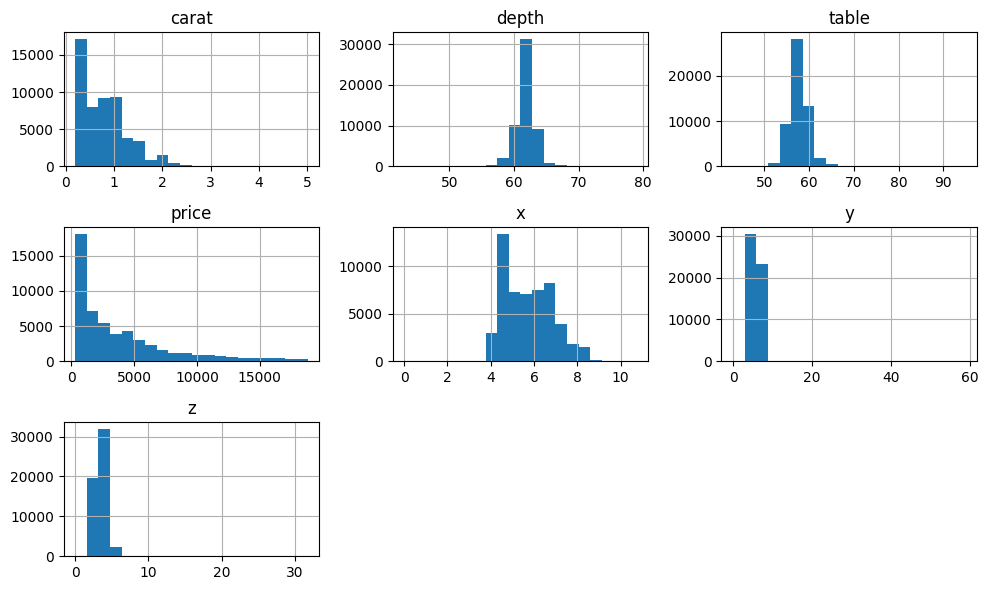

In [ ]:
# 数値変数のヒストグラム
plt.rcParams["figure.figsize"] = (10, 6)
df.hist(bins=20)
plt.tight_layout()
plt.show()

In [ ]:
# 数値データのヒストグラム
plt.rcParams["figure.figsize"] = (10, 6)
df.hist(bins=20)
plt.tight_layout()
plt.show()

In [ ]:
# ダイヤモンドの価格の統計情報
df["price"].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

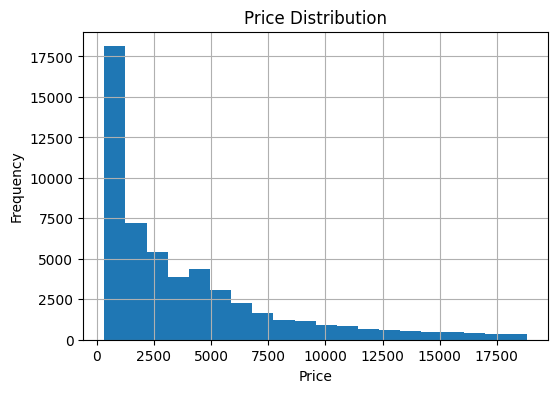

In [ ]:
# 価格のヒストグラム
plt.figure(figsize=(6, 4))
df["price"].hist(bins=20)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Price Distribution")
plt.show()

In [ ]:
# ----------------------------------------
# 2数値変数EDA
# ----------------------------------------

In [ ]:
# カテゴリ変数のEDA
# カテゴリ変数の要約統計量
cat_vars = df.select_dtypes(include=["object"]).columns
df[cat_vars].describe().T

In [ ]:
# カテゴリ変数の要約統計量
df.describe(exclude="number").T

In [ ]:
# カテゴリ変数のリスト表示
cat_cols = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "gender",
    "native-country",
    "income",
]
for col in cat_cols:
    print(f"{col}: {list(df[col].unique())}")

In [ ]:
# カテゴリ変数の棒グラフ可視化
cat_cols = df.select_dtypes(include=["object"]).columns
plt.rcParams["figure.figsize"] = (12, 24)
for i, col in enumerate(cat_cols):
    ax = plt.subplot(5, 2, i + 1)
    df[col].value_counts().plot(kind="bar", ax=ax)

plt.tight_layout()
plt.show()

In [ ]:
# データの前処理

In [ ]:
# 半角スペースの削除
cat_cols = df.select_dtypes(include=["object"]).columns

for col in cat_cols:
    df[col] = df[col].str.replace(" ", "")

In [ ]:
# カテゴリ変数のリスト表示
for col in cat_cols:
    print(f"{col}: {list(df[col].unique())}")

In [ ]:
# レコードの絞り込み（United-Statesのみ）
df = df[df["native-country"] == "United-States"]
df = df.drop(columns=["native-country"], axis=1)
df.reset_index(drop=True, inplace=True)
df.shape

In [ ]:
# 前処理後のincome件数内訳
df["income"].value_counts()

In [ ]:
# 前処理後のincome件数の可視化
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x="income")

In [ ]:
# 正解ラベルの作成
df["income"] = df["income"].apply(lambda x: 1 if x == ">50K" else 0)

In [ ]:
# データセットの確認
print(df.shape)
df.head()

In [ ]:
# 混同行列と正解率の検証

In [ ]:
# 特徴量と正解ラベルの分割
X = df.drop(columns=["income"], axis=1)
y = df["income"]

In [ ]:
# 学習データとテストデータの分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=0, stratify=y
)
print("X_trainの形状:", X_train.shape)
print("y_trainの形状:", y_train.shape)
print("X_testの形状:", X_test.shape)
print("y_testの形状:", y_test.shape)

In [ ]:
print("y_trainの内訳:\n", y_train.value_counts())
print("y_testの内訳:\n", y_test.value_counts())

In [ ]:
# 予測ラベル0の作成
y_test_zero = np.zeros(5834)
y_test_zero

In [ ]:
# 予測ラベル0の混同行列の作成
cm = confusion_matrix(y_test, y_test_zero)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# 予測ラベルの評価指標の計算
ac_score = accuracy_score(y_test, y_test_zero)
pr_score = precision_score(y_test, y_test_zero)
rc_score = recall_score(y_test, y_test_zero)
f1 = f1_score(y_test, y_test_zero)

print(f"Accuracy: {ac_score:.2f}")
print(f"Precision: {pr_score:.2f}")
print(f"Recall: {rc_score:.2f}")
print(f"F1 Score: {f1:.2f}")

In [ ]:
# 予測ラベル1の作成
y_test_ones = np.ones(5834)
y_test_ones

In [ ]:
# 予測ラベル0の混同行列の作成
cm = confusion_matrix(y_test, y_test_ones)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# 予測ラベルの評価指標の計算
ac_score = accuracy_score(y_test, y_test_ones)
pr_score = precision_score(y_test, y_test_ones)
rc_score = recall_score(y_test, y_test_ones)
f1 = f1_score(y_test, y_test_ones)

print(f"Accuracy: {ac_score:.2f}")
print(f"Precision: {pr_score:.2f}")
print(f"Recall: {rc_score:.2f}")
print(f"F1 Score: {f1:.2f}")